# HW 4


In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline

## 1. Global Earthquakes
In this problem set, we will use this file from the USGS Earthquakes Database. The dataset is similar to the one you use in Assignment 02. Use the file provided (usgs_earthquakes.csv) to recreate the following map. Use the mag column for magnitude. [10 points]

In [2]:
ds1 =pd.read_csv('usgs_earthquakes.csv')
# find the 50th mag
mag_50 =ds1.where(ds1.type =='earthquake').sort_values('mag',ascending=False).head(50).mag.min()
# select data which is larger than 50th mag
ds1_top50 =ds1.loc[ds1.mag >= mag_50].where(ds1.type =='earthquake').sort_values('mag',ascending=False).reset_index()
print(ds1_top50['mag'])

0     8.2
1     7.9
2     7.7
3     7.6
4     7.5
5     7.4
6     7.3
7     7.2
8     7.1
9     7.1
10    7.1
11    7.0
12    6.9
13    6.9
14    6.9
15    6.9
16    6.9
17    6.9
18    6.9
19    6.9
20    6.8
21    6.8
22    6.8
23    6.8
24    6.7
25    6.7
26    6.7
27    6.7
28    6.7
29    6.6
30    6.6
31    6.6
32    6.6
33    6.6
34    6.6
35    6.6
36    6.6
37    6.6
38    6.6
39    6.5
40    6.5
41    6.5
42    6.5
43    6.5
44    6.5
45    6.5
46    6.5
47    6.5
48    6.5
49    6.5
50    6.5
51    6.5
52    6.5
53    6.5
Name: mag, dtype: float64


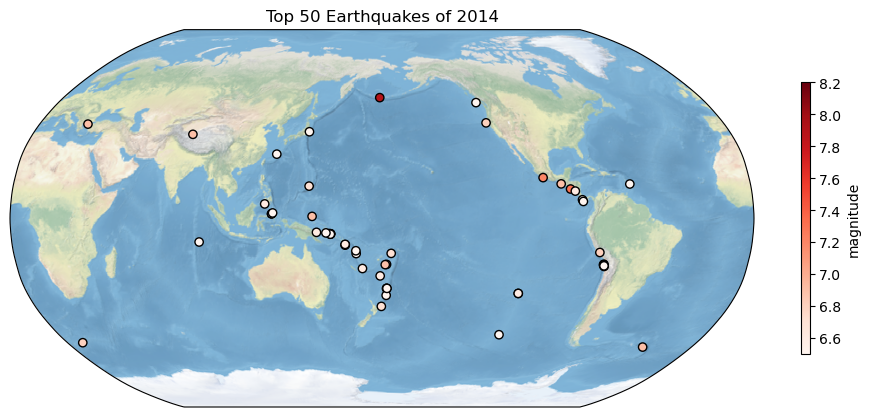

In [3]:
plt.figure(figsize=(12,12), dpi=100)

# Create an axes with an Robinson projection style
proj = ccrs.Robinson(180)
ax = plt.axes(projection=proj)
ax.stock_img()

# adding data
ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

plt.scatter('longitude', 'latitude',data= ds1_top50,
            transform=ccrs.PlateCarree(),
            c= 'mag',
            cmap='Reds', 
            edgecolors='black'
         )

plt.title('Top 50 Earthquakes of 2014',fontsize =12)
plt.colorbar(shrink=0.3,label ='magnitude',format ="%1.1f",aspect =30)
plt.show()

## 2. Explore a netCDF dataset
Browse the NASA’s Goddard Earth Sciences Data and Information Services Center (GES DISC) website. Search and download a dataset you are interested in. You are also welcome to use data from your group in this problem set. But the dataset should be in netCDF format. For this problem set, you are welcome to use the same dataset you used in Assignment 03.

In [3]:
ds2 =xr.open_dataset('MERRA2_400.tavg1_2d_ocn_Nx.20220923.nc4')
ds2.info()
# open water skin temperature
ds2_tem =ds2.TSKINWTR.mean(dim='time')
# 10m wind speed
ds2_v10m =ds2.V10M.mean(dim ='time')
ds2_u10m =ds2.U10M.mean(dim ='time')

xarray.Dataset {
dimensions:
	lon = 576 ;
	lat = 361 ;
	time = 24 ;

variables:
	float64 lon(lon) ;
		lon:long_name = longitude ;
		lon:units = degrees_east ;
		lon:vmax = 999999986991104.0 ;
		lon:vmin = -999999986991104.0 ;
		lon:valid_range = [-1.e+15  1.e+15] ;
	float64 lat(lat) ;
		lat:long_name = latitude ;
		lat:units = degrees_north ;
		lat:vmax = 999999986991104.0 ;
		lat:vmin = -999999986991104.0 ;
		lat:valid_range = [-1.e+15  1.e+15] ;
	datetime64[ns] time(time) ;
		time:long_name = time ;
		time:time_increment = 10000 ;
		time:begin_date = 20220923 ;
		time:begin_time = 3000 ;
		time:vmax = 999999986991104.0 ;
		time:vmin = -999999986991104.0 ;
		time:valid_range = [-1.e+15  1.e+15] ;
	float32 EFLUXICE(time, lat, lon) ;
		EFLUXICE:long_name = sea_ice_latent_energy_flux ;
		EFLUXICE:units = W m-2 ;
		EFLUXICE:fmissing_value = 999999986991104.0 ;
		EFLUXICE:standard_name = sea_ice_latent_energy_flux ;
		EFLUXICE:vmax = 999999986991104.0 ;
		EFLUXICE:vmin = -999999986991104.0

2.1 [10 points] Make a global map of a certain variable. Your figure should contain: a project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

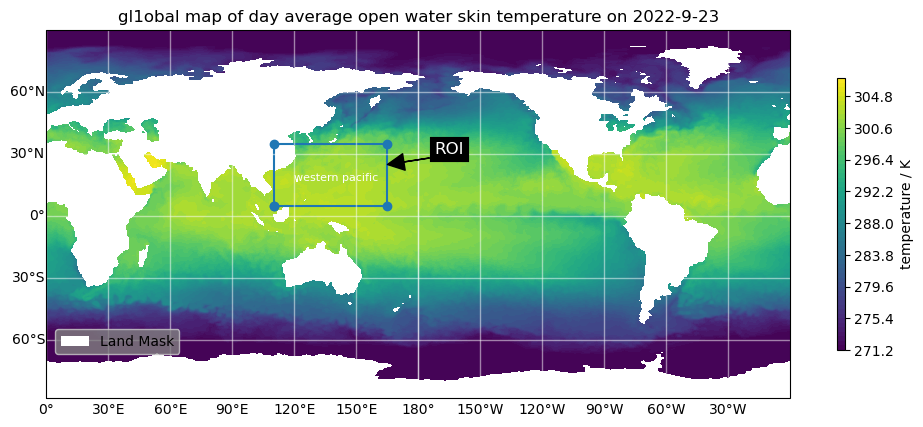

In [9]:
plt.figure(figsize=(12,12), dpi=100)

# Create an axes with an PlateCarree style
proj1 =ccrs.PlateCarree(180)
ax1 = plt.axes(projection=proj1)
ax1.add_feature(cfeature.LAND, edgecolor='white', facecolor='white', zorder=0)

# adding data
plt.contourf(ds2_tem.lon, ds2_tem.lat, ds2_tem.values, 60,
             transform=ccrs.PlateCarree())
plt.colorbar(shrink=0.3,label ='temperature / K',format ="%1.1f",aspect =35)

# Add lat/lon gridlines, draw gridlines
gl1 = ax1.gridlines(linewidth=1, color='white', alpha=0.5, draw_labels=True)
# Manipulate latitude and longitude gridline numbers and spacing
gl1.ylocator = mticker.FixedLocator(np.arange(-90,91,30))
gl1.xlocator = mticker.FixedLocator(np.arange(-180, 181, 30))
gl1.top_labels = False
gl1.right_labels = False

# title
ax1.set_title('gl1obal map of day average open water skin temperature on 2022-9-23',fontsize =12)

# annotations and text
box_x, box_y =[110,110,165,165,110],[5,35,35,5,5]
ax1.plot(box_x, box_y, marker='o', transform=ccrs.PlateCarree())
plt.annotate('ROI', xy=(-15, 25), xytext=(15, 30),
             bbox=dict(boxstyle='square', fc='black', linewidth=0.1),
             arrowprops=dict(facecolor='black', shrink=0.001, width=0.1), 
             fontsize=12, color='white', horizontalalignment='center')
plt.text(140, 17, "western pacific", size =8,
             transform=ccrs.PlateCarree(), horizontalalignment='center', color='white')

# legend
direct_hit = mpatches.Rectangle((0, 0), 1, 1, facecolor="white")
labels = ['Land Mask']
ax1.legend([direct_hit], labels,
            loc='lower left', bbox_to_anchor=(0.0025,0.1), fancybox=True, facecolor ='gray')
plt.show()

2.2 [10 points] Make a regional map of the same variable. Your figure should contain: a different project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

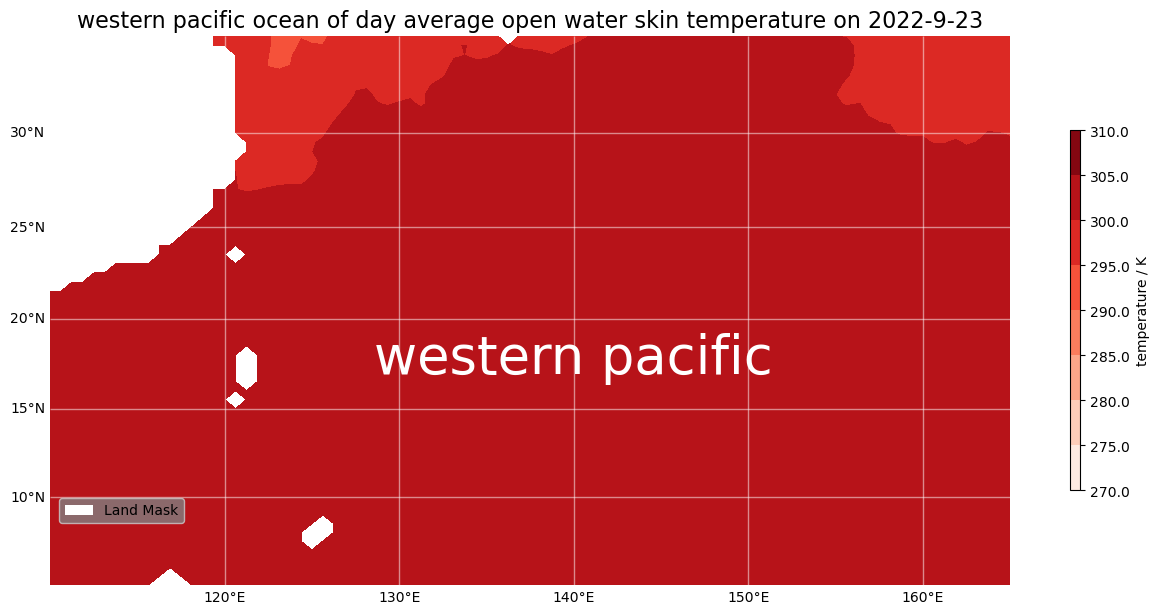

In [16]:
fig =plt.figure(figsize=(12,12), dpi=100)

# Create an axes with an PlateCarree style
proj2 =ccrs.Orthographic(130)
ax2 =fig.add_axes([0, 0, 1, 1], projection=ccrs.Miller(),
                      frameon=False)
ax2.add_feature(cfeature.LAND, edgecolor='white', facecolor='white', zorder=0)

# adding data
plt.contourf(ds2_tem.lon, ds2_tem.lat, ds2_tem.values,cmap ='Reds',
             transform=ccrs.PlateCarree(),zorder=1)

# colorbar
plt.colorbar(shrink=0.3,label ='temperature / K',format ="%1.1f",aspect =35)

# region
extent = [110,165, 5,35]
ax2.set_extent(extent, ccrs.PlateCarree())

# title
ax2.set_title('western pacific ocean of day average open water skin temperature on 2022-9-23',fontsize =16)
ax2.set_xlabel('lat')

# grid
gl2 = ax2.gridlines(linewidth=1, color='white', alpha=0.5, draw_labels=True)
gl2.top_labels = False
gl2.right_labels = False

# annotations and text
plt.annotate('CHINA', xy=(-2000000,2500000), xytext=(-1000000,1300000),
             bbox=dict(boxstyle='square', fc='black', linewidth=0.1),
             arrowprops=dict(facecolor='black', shrink=0.001, width=0.1), 
             fontsize=12, color='white')
plt.text(140, 17, "western pacific", size =38,
             transform=ccrs.PlateCarree(), horizontalalignment='center', color='white')

# legend
ax2.legend([mpatches.Rectangle((0, 0), 1, 1, facecolor="white")], ['Land Mask'],
            loc='lower left', bbox_to_anchor=(0.0025,0.1), fancybox=True, facecolor ='gray')
plt.show()